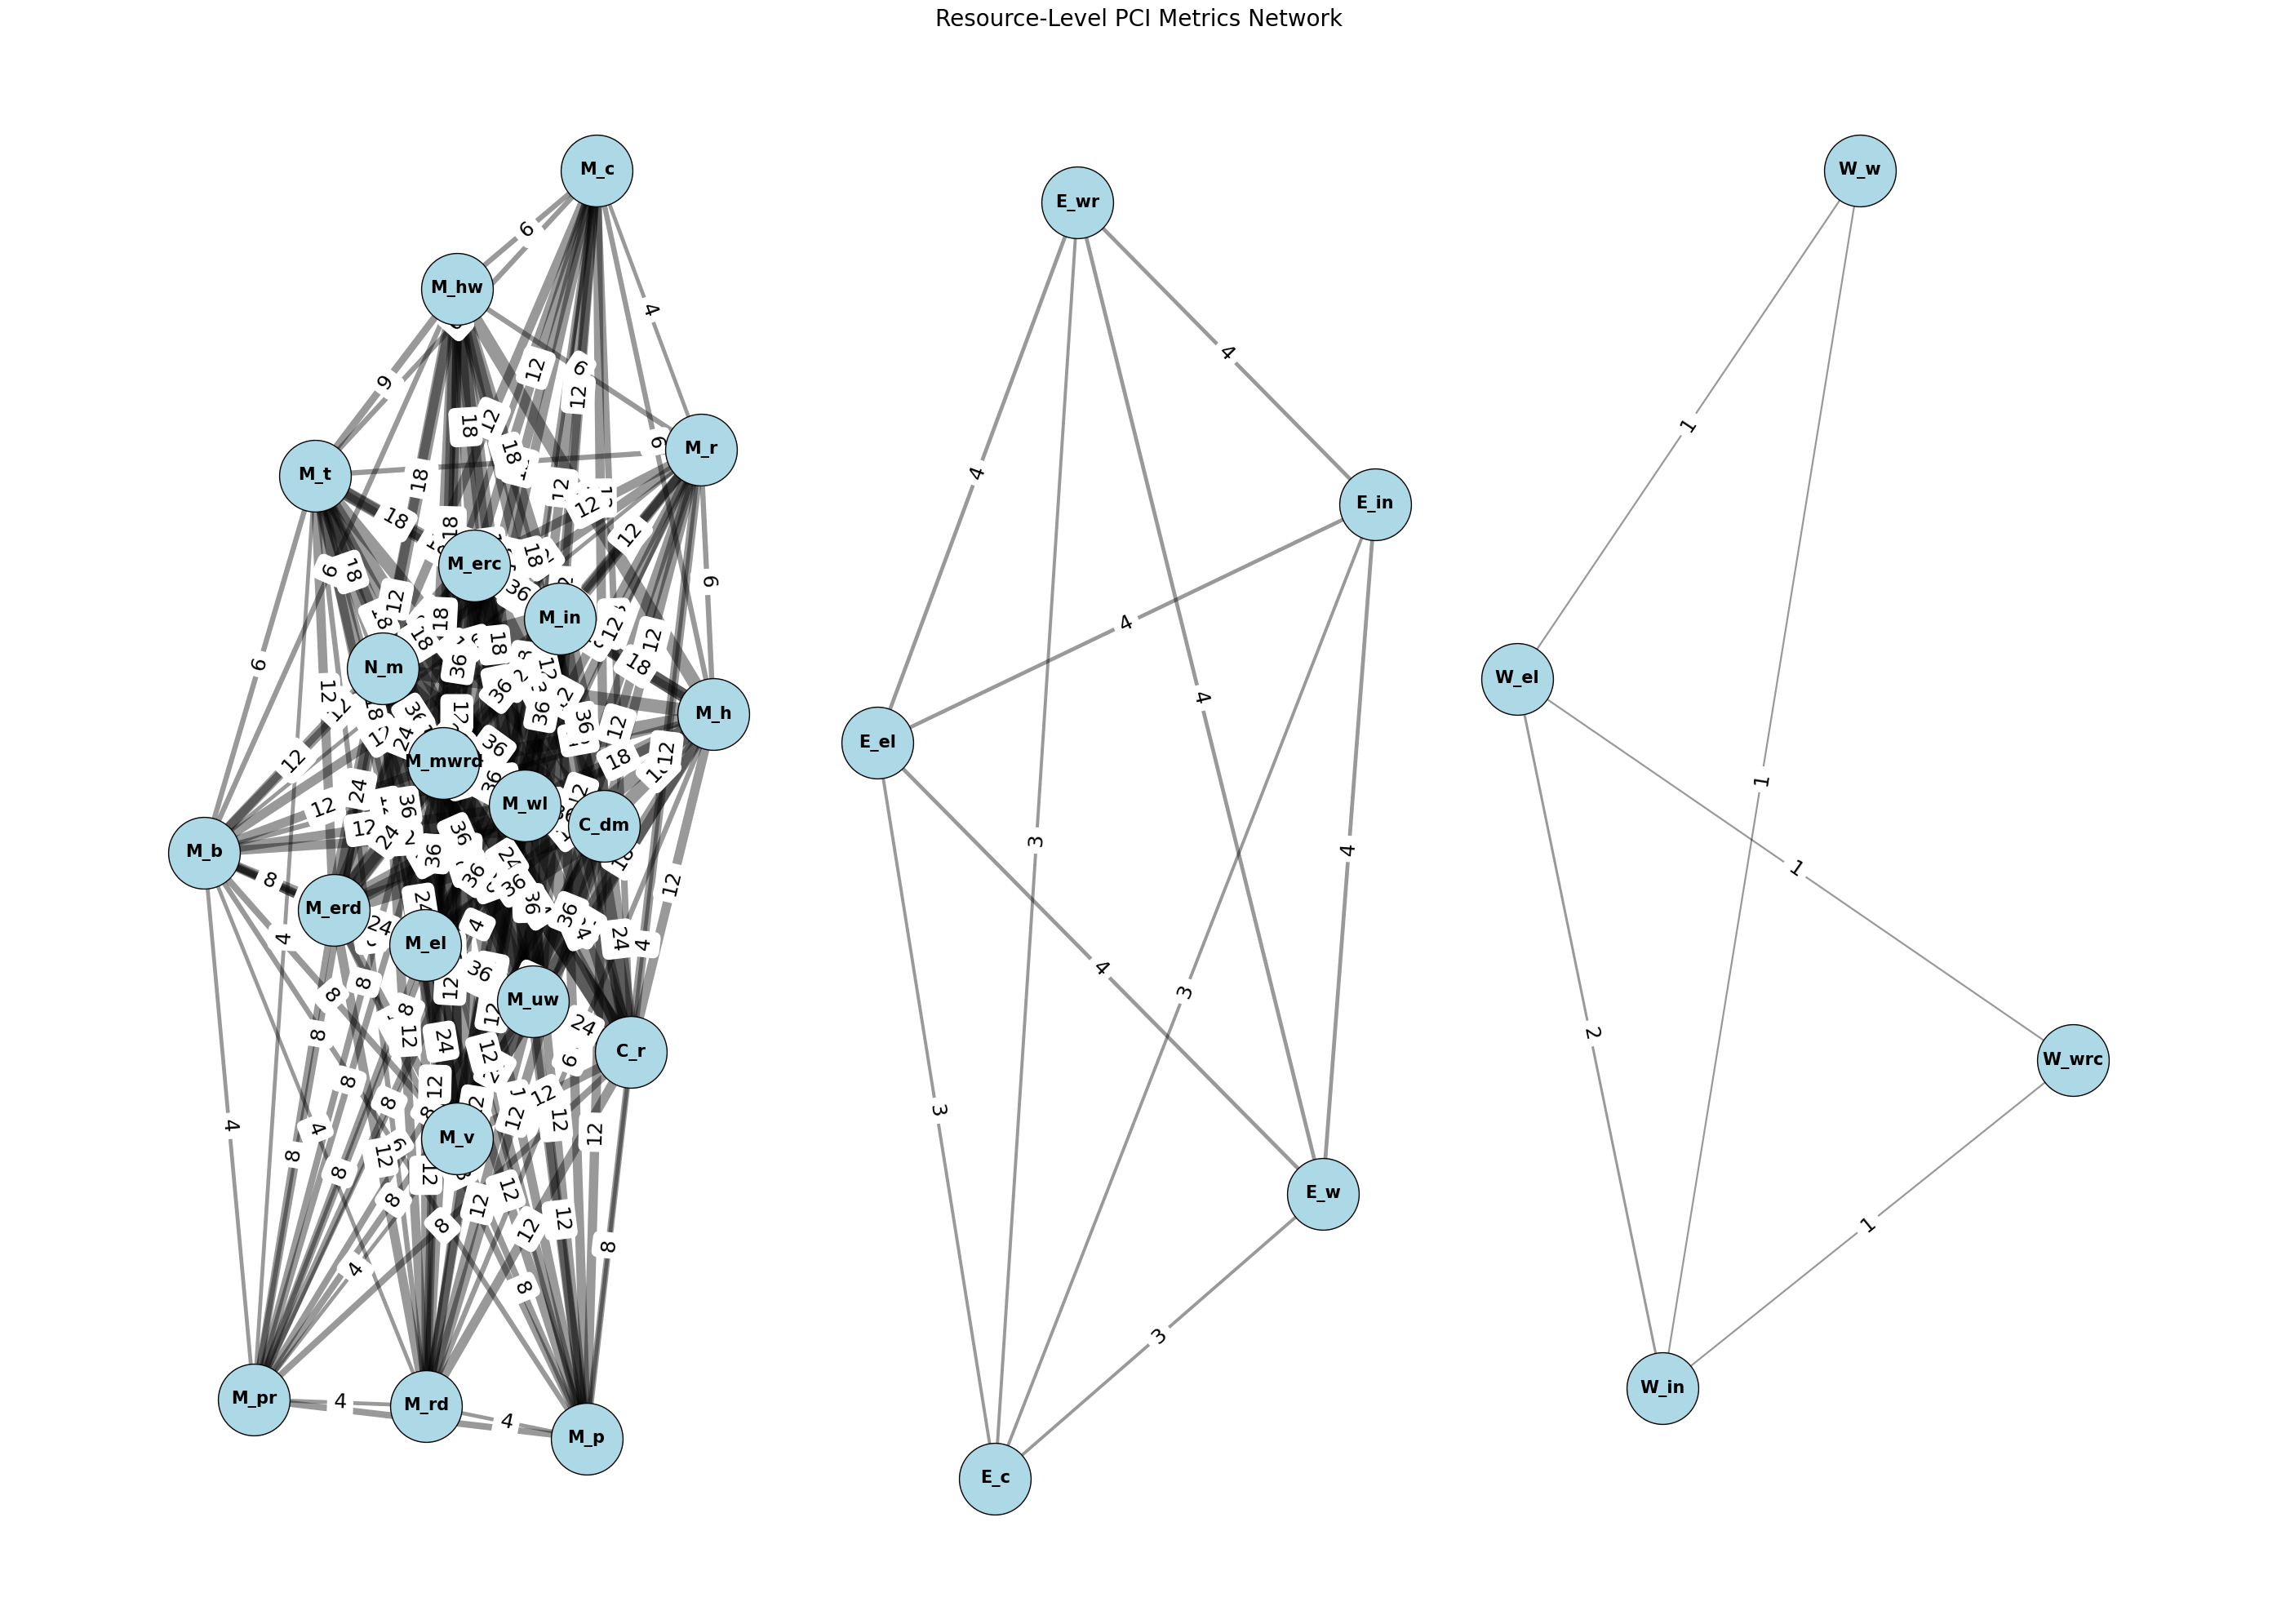


Eigenvector Centrality Results
        Eigenvector Centrality (weighted)
C_dm                                 0.30
C_r                                  0.22
E_c                                  0.00
E_el                                 0.00
E_in                                 0.00
E_w                                  0.00
E_wr                                 0.00
M_b                                  0.11
M_c                                  0.11
M_el                                 0.30
M_erc                                0.30
M_erd                                0.22
M_h                                  0.16
M_hw                                 0.16
M_in                                 0.30
M_mwrd                               0.30
M_p                                  0.10
M_pr                                 0.07
M_r                                  0.12
M_rd                                 0.11
M_t                                  0.16
M_uw                                 0.30
M_

In [6]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# === Step 1: Load Data ===
file_path = 'Resource_Level Metric Parametrization.csv'
df = pd.read_csv(file_path) 
df = df[['Primary Parameter Notation', 'List of Sub-parameters']].dropna()
df['List of Sub-parameters'] = df['List of Sub-parameters'].str.split(', ')
param_to_subs = dict(zip(df['Primary Parameter Notation'], df['List of Sub-parameters']))

# === Step 2: Build Graph with Raw and Inverted Weights ===
G = nx.Graph()
G.add_nodes_from(param_to_subs.keys())
primary_params = list(param_to_subs.keys())

for i in range(len(primary_params)):
    for j in range(i + 1, len(primary_params)):
        p1, p2 = primary_params[i], primary_params[j]
        shared = set(param_to_subs[p1]) & set(param_to_subs[p2])
        if shared:
            weight = len(shared)
            inv_weight = 1 / weight  # <-- Invert the weight for closeness
            G.add_edge(p1, p2, weight=weight, inv_weight=inv_weight)

# === Step 3: Visualization (Optional) ===
plt.figure(figsize=(28, 20))

# Assign different positions for disconnected components
pos = {}
x_offset = 0
for component in nx.connected_components(G):
    subgraph = G.subgraph(component)
    sub_pos = nx.spring_layout(subgraph, seed=42, k=4)  # k controls spacing

    # Apply offset to keep clusters apart
    for node in sub_pos:
        sub_pos[node][0] += x_offset
    pos.update(sub_pos)
    x_offset += 2.2  # space out components horizontally

# Draw
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=4000, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=[1.0 + 0.6 * w for w in edge_weights], alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=15, font_weight='bold')

# Optional edge labels
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=18)

plt.title("Resource-Level PCI Metrics Network", fontsize=20)
plt.axis('off')
plt.tight_layout()

# Save and show
plt.savefig("Resource-Level PCI Metrics Network.png", dpi=300, bbox_inches='tight')
plt.show()

# === Step 4: Calculate Centrality Measures ===
centrality_df = pd.DataFrame({
    'Eigenvector Centrality (weighted)': nx.eigenvector_centrality(G, weight='weight', max_iter=1000), 
})

# Round for readability
centrality_df = centrality_df.round(2)

# Group parameters by score
grouped = centrality_df.groupby('Eigenvector Centrality (weighted)').apply(
    lambda x: ', '.join(x.index)
).reset_index()
grouped.columns = ['Eigenvector Centrality (weighted)', 'Parameters']

# Sort by descending score
grouped = grouped.sort_values(by='Eigenvector Centrality (weighted)', ascending=False)

# === Step 5: Print and Save ===
grouped.to_csv("Eigenvector Centrality Results.csv", index=False)
print("\nEigenvector Centrality Results")
print(centrality_df)

print("\nTop Scoring Parameters:")
for measure in centrality_df.columns:
    max_val = centrality_df[measure].max()
    top_params = centrality_df[centrality_df[measure] == max_val].index.tolist()
    top_str = ', '.join(top_params)
    print(f"{measure}: {top_str} ({max_val})")



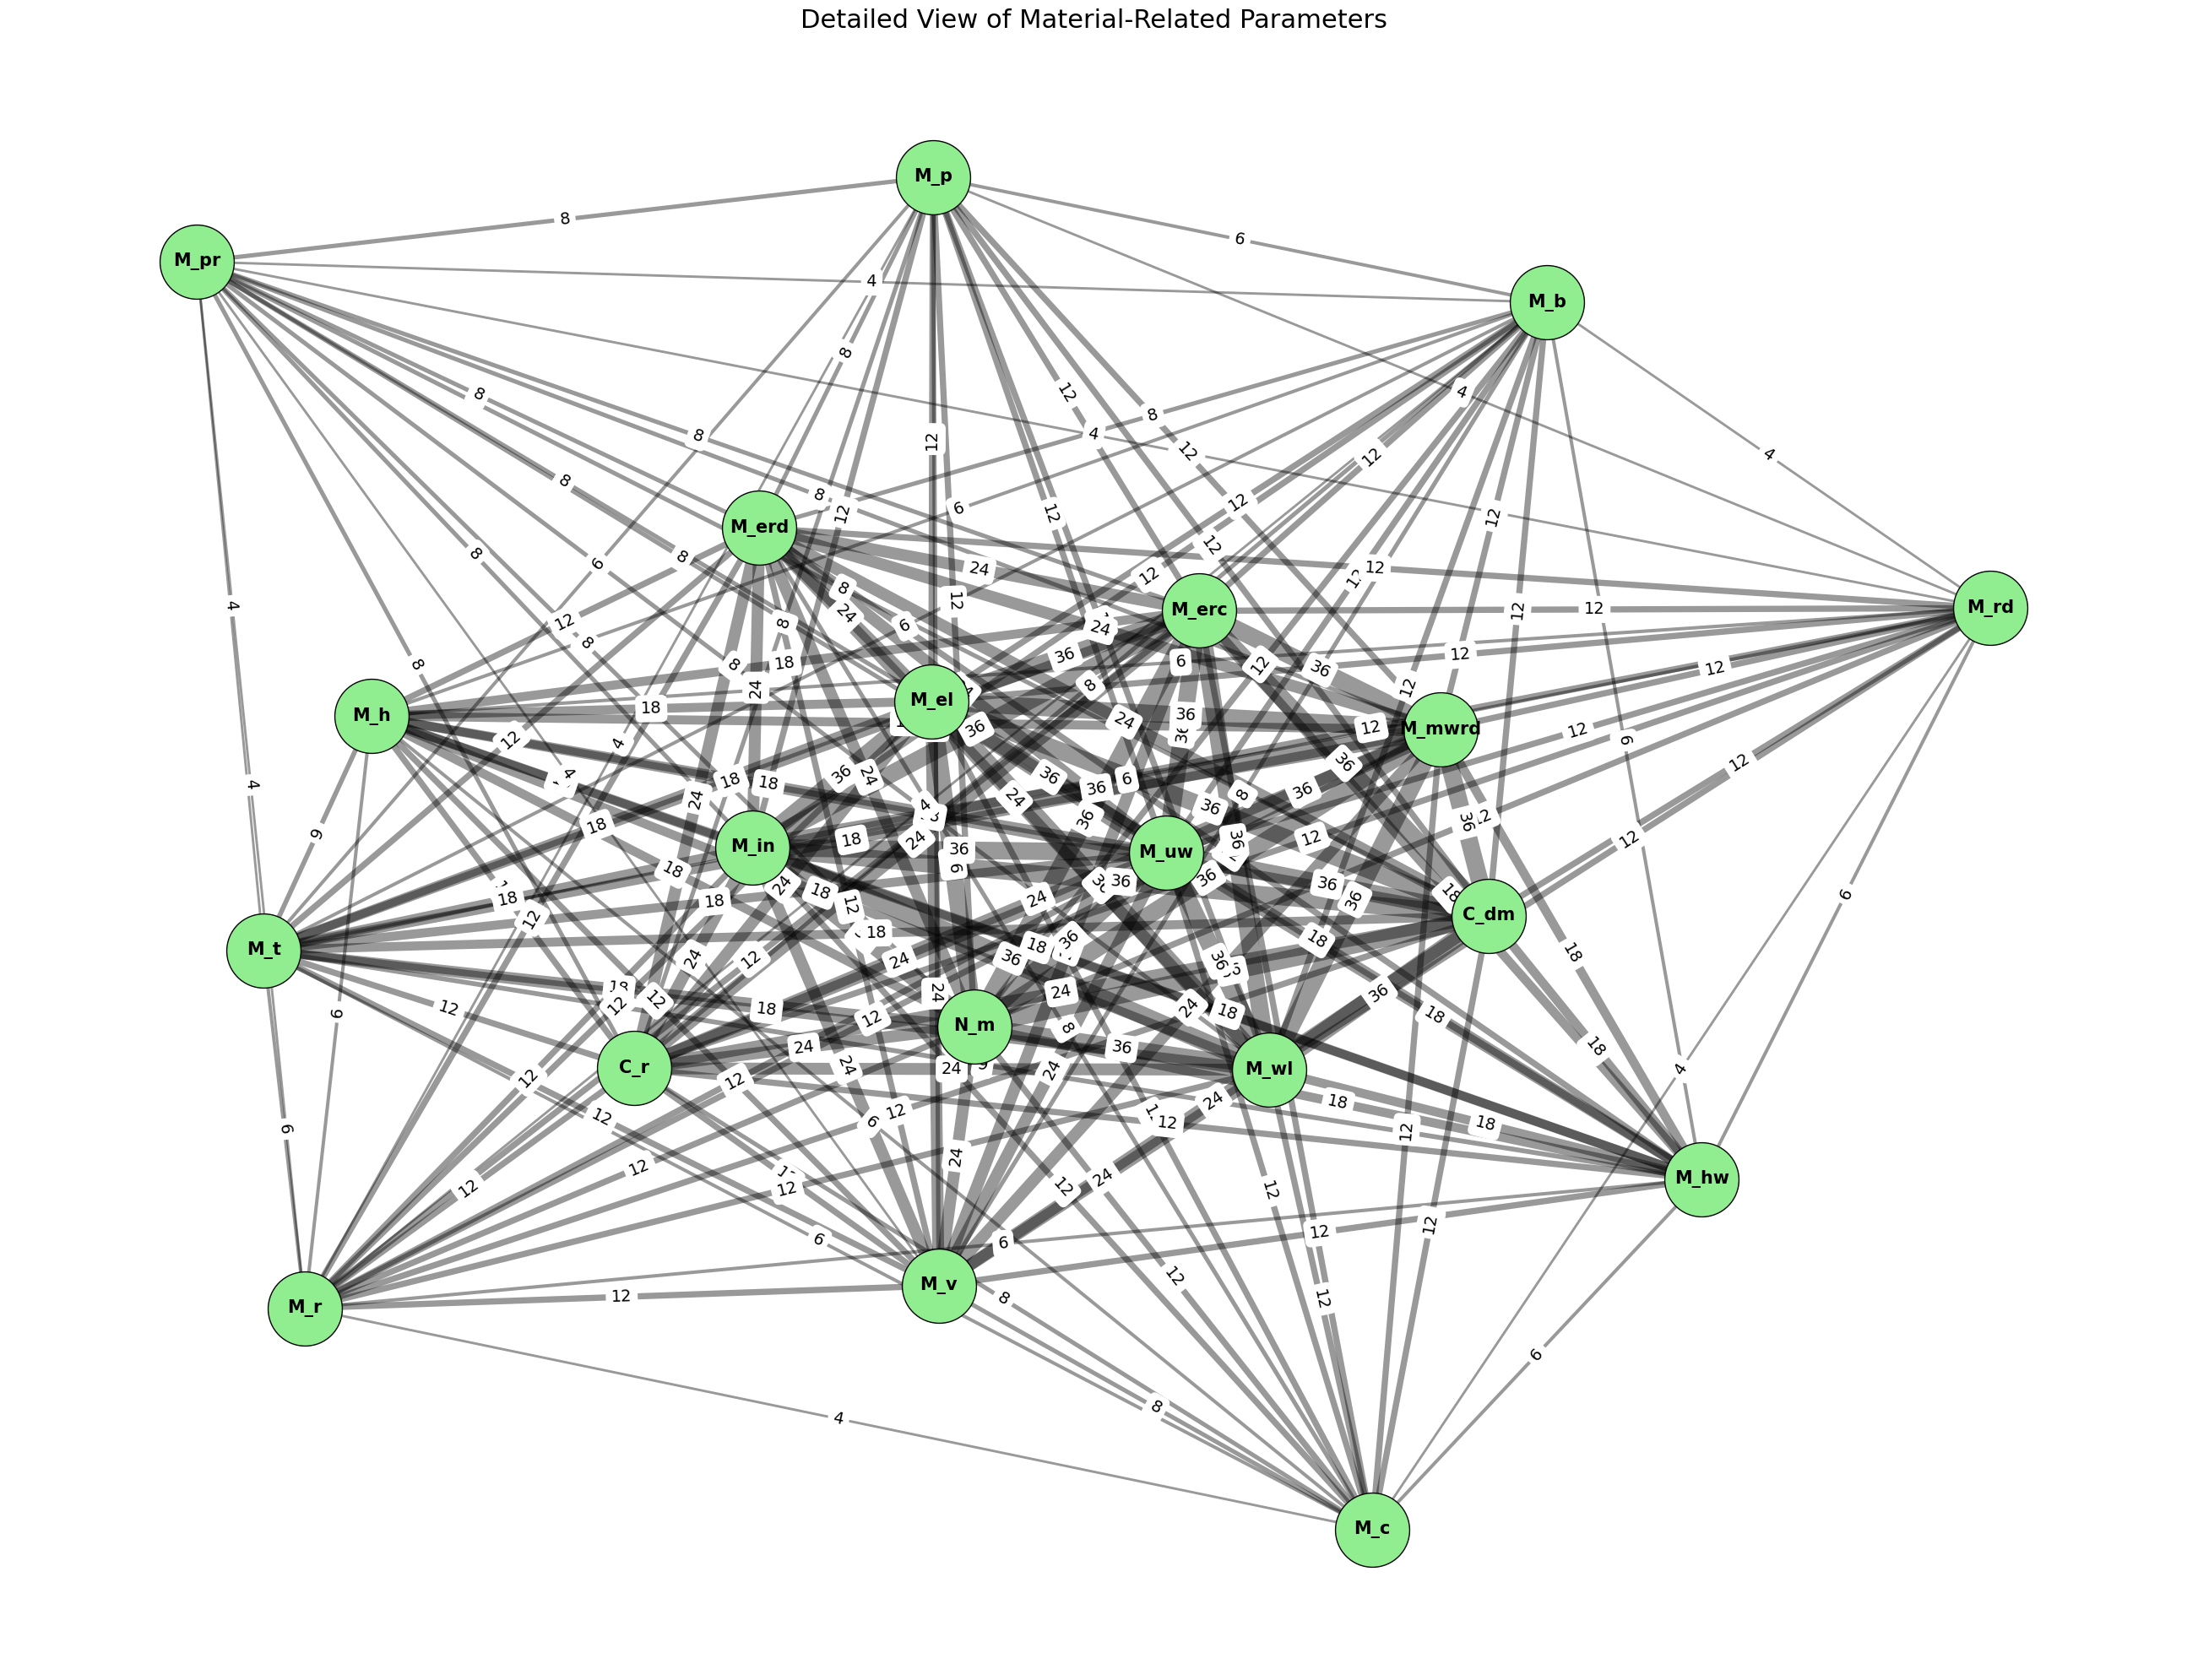

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load CSV
file_path = 'Resource_Level Metric Parametrization.csv'
df = pd.read_csv(file_path)
df = df[['Primary Parameter Notation', 'List of Sub-parameters']].dropna()
df['List of Sub-parameters'] = df['List of Sub-parameters'].str.split(', ')
param_to_subs = dict(zip(df['Primary Parameter Notation'], df['List of Sub-parameters']))

# Build full graph
G = nx.Graph()
G.add_nodes_from(param_to_subs.keys())

for i, p1 in enumerate(param_to_subs):
    for j in range(i + 1, len(param_to_subs)):
        p2 = list(param_to_subs.keys())[j]
        shared = set(param_to_subs[p1]) & set(param_to_subs[p2])
        if shared:
            G.add_edge(p1, p2, weight=len(shared))

# Filter nodes that contain material(mass) related subparameters
selected_nodes = [n for n in G.nodes if n.startswith("M_") or n.startswith("C_r") or n.startswith("C_dm") or n.startswith("N_m")]
selected_subgraph = G.subgraph(selected_nodes)

# Generate layout for selected subgraph
pos = nx.spring_layout(selected_subgraph, seed=60, k=8, iterations=300)

# Plot selected subgraph
plt.figure(figsize=(26, 20))
edge_weights = [selected_subgraph[u][v]['weight'] for u, v in selected_subgraph.edges()]
nx.draw_networkx_nodes(selected_subgraph, pos, node_color='lightgreen', node_size=4000, edgecolors='black')
nx.draw_networkx_edges(selected_subgraph, pos, width=[0.5 + 0.4 * w for w in edge_weights], alpha=0.4)
nx.draw_networkx_labels(selected_subgraph, pos, font_size=15, font_weight='bold')

# Edge weights (optional)
edge_labels = {(u, v): selected_subgraph[u][v]['weight'] for u, v in selected_subgraph.edges()}
nx.draw_networkx_edge_labels(selected_subgraph, pos, edge_labels=edge_labels, font_size=14)

plt.title("Detailed View of Material-Related Parameters", fontsize=22)
plt.axis('off')
plt.tight_layout()
plt.savefig("Detailed View of Material-Related Parameters", dpi=300, bbox_inches='tight')
plt.show()